# Linear Regression with Multiple Variables

### Multilinear Regression& Polylinear Regression من المتوقع في نهاية هذه المحاضرة أن يكون الشخص المتعلم قادر على بناء أنظمة •
### Scikit-Learn سواء من الصفر أو بالاعتماد على مكتبة 
### Overfitting / Underfitting كما أنه من المتوقع أن يكون المتعلم قادر على التمييز بين حالات فرط الملائمة و قلة الملائمة أو ما يعرف بحالتي •
### كما يجدر بالذكر أن الشخص المتلقي سيكتسب خبرة بكيفية التعامل مع مجموعات البيانات و معالجتها من العيوب و الشوائب عبر استخدام استراتيجيات مختلفة باختلاف و تنوع الحالات

![Introduction](Images/Course Logo.PNG)

### Linear Regression قمنا سوية خلال المحاضرة الماضية بالتعرف على خوارزمية 
### Gradient Descent و خوارزمية 
### Numpy بأبسط أشكالها من أجل متغير وحيد كما قمنا بتنجيز كل ما تعلمناه من الصفر بالاعتماد على مكتبة 
![Summary](Images/What we have already done.PNG)

### أما في درس اليوم سنقوم معاً بالتعرف على مفاهيم جديدة و مهمة في مجال تعلم الآلة بالإضافة إلى تطبيق 
### ما تعلمناه في الدرس السابق من أجل حالات أعقد و عدد متغيرات أكبر, حسناً لنستعرض التغييرات التي ستطرأ
### :على الخوارزمية في هذه الحالة
![NewAlgorithm](Images/newAlgorithm.PNG)

### كما في الدرس السابق سنتبع اليوم أسلوب تطبيق الأفكار النظرية مباشرة على مشروع مبسط لسهولة الربط بين الجانبين العملي و النظري
### بداية لنستدعي المكتبات المطلوبة في أول مرحلة من مشروع اليوم (مرحلة تحضير البيانات أو المعالجة المسبقة للبيانات
### .(Data Preprocessing 

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### :لنقم بالتعرف على مجموعة البيانات التي سنتعامل معها اليوم و لنستعرض محتوياتها

In [50]:
data = pd.read_csv('50_Startups-.csv', delimiter=';')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### كما نلاحظ مجموعة بيانات اليوم تخص شركات ناشئة في مناطق معينة حيث تتلخص مهمتنا في إنشاء نموذج قادر على تقدير أرباح شركة ما بالاعتماد على 
### :معلومات أربع عنها ألا و هي
### الوقت المصروف بعمليات البحث و التطوير للشركة, الوقت المصروف للعمليات الإدارية من تأمين كادر للشركة و غيرها من الأمور, الوقت 
### المصروف للتسويق للشركة, و أخيراً موقع الشركة أو مكان تأسيسها

In [51]:
len(data)

50

In [52]:
# التحقق من وجود قيم ناقصة في مجموعة البيانات
data[data.isnull().values]

,R&D Spend,Administration,Marketing Spend,State,Profit
19,86419.70,153514.11,NaN,New York,122776.86
47,NaN,135426.92,NaN,California,42559.73
47,NaN,135426.92,NaN,California,42559.73
48,542.05,51743.15,NaN,New York,35673.41
49,NaN,116983.80,45173.06,California,14681.40


![NaN](Images/NaN Funny.jpg)

### علينا التعامل مع القيم المفقودة في مجموعة البيانات. يوجد عدة طرق للقيام بهذه المهمة 
### إحدى هذه الطرق هو أن يتم استبدالها بالمتوسط الحسابي للقيم الموجودة في العمود الذي تتم دراسته

In [53]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
# Taking care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X.iloc[:,:3:])
X.iloc[:,:3:] = imputer.transform(X.iloc[:,:3:])
X.iloc[[19,47,48,49],:]

,R&D Spend,Administration,Marketing Spend,State
19,86419.700000,153514.11,224494.784894,New York
47,76793.349583,135426.92,224494.784894,California
48,542.050000,51743.15,224494.784894,New York
49,76793.349583,116983.80,45173.060000,California


In [54]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [55]:
# التحقق مرة أخرى من عدم وجود قيم ناقصة في مجموعة البيانات

X[X.isnull().values]

,R&D Spend,Administration,Marketing Spend,State


![FreeOfNaN](Images/YES But.jpg)

![Categorical Data](Images/Categorical Data funny.png)

![One Hot Encoder](Images/One-Hot_Encoding.png)

In [56]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X['State'] = labelencoder_X.fit_transform(X['State'])

In [57]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [58]:
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()
X = pd.DataFrame(X)

In [59]:
X.head()

,0,1,2,3,4,5
0,0.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,0.0,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,0.0,1.0,144372.41,118671.85,383199.62
4,0.0,1.0,0.0,142107.34,91391.77,366168.42


## Multicollinearity and Dummy Variable
![Multicollinearity](Images/Linear Regression Multicolinearity assumption EXPLANATION.PNG)

### One Hot Encoding دوماً بعد تحويل أحد قيم الدخل باستخدام ترميز الواحد الساخن 
### Dummy Variable فإننا نقوم بحذف أحد المتحولات الناتجة الجديدة و ذلك لتفادي مشكلة 
### فبفرض تم إنشاء 100 متحول جديد نقوم بحذف أحد المتحولات ليصبح عددها 99

In [60]:
# Avoiding the Dummy Variable Trap
X = X.iloc[:, 1:]

In [61]:
X.head()

,1,2,3,4,5
0,0.0,1.0,165349.20,136897.80,471784.10
1,0.0,0.0,162597.70,151377.59,443898.53
2,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,1.0,144372.41,118671.85,383199.62
4,1.0,0.0,142107.34,91391.77,366168.42


### :الآن بعد أن أصبحت مجموعة البيانات مقبولة لنبدأ بعملية التدريب 

### فصل مجموعة البيانات المتاحة إلى قسمين قسم مخصص للتدريب و القسم الآخر المتبقي للاختبار
### :سنقوم بتخصيص 80% من البيانات للتدريب و 20% للاختبار

In [62]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## تقييس الميزات
![Feature_Scaling_1](Images/Feature Scaling1.PNG)

### [لتجنب هذه المشكلة فإننا نلجأ إلى تقييس الميزات و جعل قيمها تتراوح تقريباً ضمن المجال[-1, +1

![Feature_Scaling_2](Images/Feature Scaling2.PNG)

![Feature_Scaling_3](Images/Feature Scaling.PNG)

In [63]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)'

![NewAlgorithm](Images/newAlgorithm.PNG)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
reg = LinearRegression()

In [66]:
reg??

In [67]:
#a = reg.fit(X_train, y_train)
#a??
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
# Predicting the Test set results
y_pred = reg.predict(X_test)
y_pred.shape

(10,)

In [69]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

169556941.58931312

![](Images/why-meme.jpg)

![](Images/Building Model Methods.PNG)

![](Images/All-in Method - Building Model.PNG)

In [70]:
X.head()

,1,2,3,4,5
0,0.0,1.0,165349.20,136897.80,471784.10
1,0.0,0.0,162597.70,151377.59,443898.53
2,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,1.0,144372.41,118671.85,383199.62
4,1.0,0.0,142107.34,91391.77,366168.42


In [71]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [72]:
X = X.iloc[:,2]

In [73]:
X.head()

0    165349.20
1    162597.70
2    153441.51
3    144372.41
4    142107.34
Name: 3, dtype: float64

In [74]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X).T, np.array(y), test_size = 0.2, random_state = 0)
y_train.shape

(40,)

In [75]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(X_train.reshape(40,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
X_test

array([  66051.52,  100671.96,  101913.08,   27892.92,  153441.51,
         72107.6 ,   20229.59,   61136.38,   73994.56,  142107.34])

In [77]:
# Predicting the Test set results
y_pred = reg1.predict(X_test.reshape(-1,1))
y_pred.shape

(10,)

In [78]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

112566388.53810084

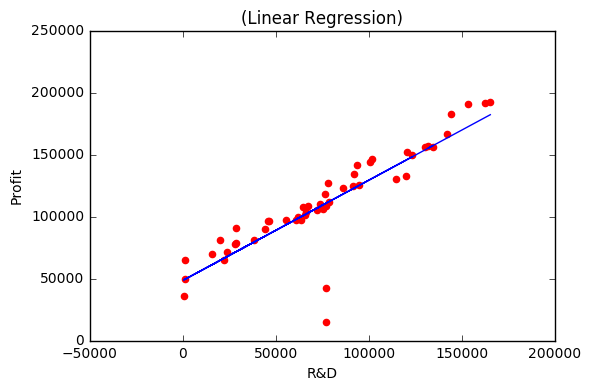

In [79]:
# Visualising the Linear Regression results
plt.scatter(X.values.reshape(-1,1), y, color = 'red')
plt.plot(X, reg1.predict(X.values.reshape(-1,1)), color = 'blue')
plt.title('(Linear Regression)')
plt.xlabel('R&D')
plt.ylabel('Profit')
plt.show()

![](Images/Linear Regression Outliers EXPLANATION.PNG)

![](Images/Linear Regression Outliers.PNG)

![](Images/Linear Regression Outliers DECISION TREE.PNG)

In [80]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X.values.reshape(-1,1))
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

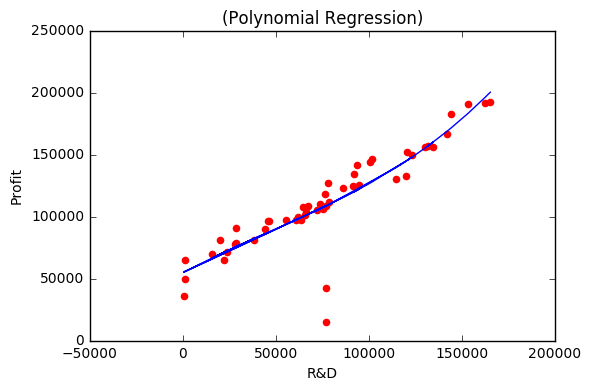

In [81]:
# Visualising the Polynomial Regression results
plt.scatter(X.values.reshape(-1,1), y, color = 'red')
plt.plot(X.values.reshape(-1,1), lin_reg_2.predict(poly_reg.fit_transform(X.values.reshape(-1,1))), color = 'blue')
plt.title('(Polynomial Regression)')
plt.xlabel('R&D')
plt.ylabel('Profit')
plt.show()

## The Bias-Variance Dilemma
![](Images/Overfitting funny doger_fitting.jpg)

## Fukushima Power Plant Disaster

![Bias_Variance_Delimma](Images/Fukushima earthquake-overfit.png)

![](Images/Fukushima earthquake-fit.png)

![](Images/Fukushima earthquake-fit-analysis.png)

![](Images/complexity.png)


<a href="Images/index.html"><h1>-------------------------انقر هنا - يوجد مثال توضيحي هام-------------------------</h1></a>

## Gauss–Markov theorem
<a href='https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem'><b>Click here for more Information</b></a>
![](Images/OLS Assumptions.PNG)

##### References: 
##### • https://goo.gl/8u1fRD
##### • https://goo.gl/fGyjXT
##### • https://goo.gl/aV5JVb
##### • https://goo.gl/WfzG9b